In [3]:
import numpy as np
from scipy.sparse import diags, kron, csr_matrix, csc_matrix, identity
from scipy.sparse.linalg import spsolve, norm, inv, eigsh, eigs
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [4]:
plt.style.use('seaborn')
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

In [5]:
def solve_heat_equation(N, dt, T, f):
    d1 = np.ones(N-1)
    d0 = np.ones(N)
    d_1 = np.ones(N-1)

    D = np.array([dt*d1, (1-2*dt)*d0, dt*d_1], dtype=object)
    offset = [-1, 0, 1]
    A = diags(D, offset)
    u0 = np.array([f(i/(N-1)) for i in range(N)]) 

    U = np.zeros((N+2, T+1))
    U[1:-1, 0] = u0
    ut_1 = u0
    for t in range(T):
        ut = A @ ut_1
        U[1:-1, t+1] = ut
        ut_1 = ut
    return U

In [27]:
def plot(sol, title, cmap="coolwarm", vmin=-1, vmax=1, dt=1/2):
    plt.imshow(sol, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.grid(False)
    plt.xlabel("Tiempo (t)");
    plt.ylabel("Posición (x)");
    plt.title(title);
    
    locs, labels=plt.yticks()
    y_ticks = []
    new_yticks=[np.round(i/(len(locs)-3), 1) for i in range(-1, len(locs)-1)]
    plt.yticks(locs[1:-1],new_yticks[1:-1], rotation=0, horizontalalignment='right');
    
    locs, labels=plt.xticks()
    x_ticks = []
    new_xticks=[np.round(i*dt, 1) for i in range(-1, len(locs)-1)]
    plt.xticks(locs[1:-1],new_xticks[1:-1], rotation=0, horizontalalignment='right');
    

In [28]:
N = 148
dt = 1/2 - 0.0001
T = 150*4

Wall time: 270 ms


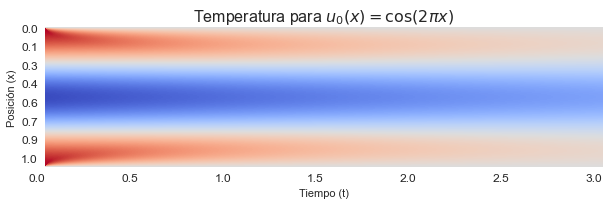

In [33]:
%%time
n=2
f = lambda x: np.cos(n*x*np.pi)
U1 = solve_heat_equation(N, dt, T, f)
plot(
    sol=U1, 
    title=u"Temperatura para $u_0(x) = \cos(2\pi x)$", 
    cmap="coolwarm", 
    vmin=-1, vmax=1,
    dt=dt
)
plt.savefig("fig1.pdf", bbox_inches='tight', )

Wall time: 295 ms


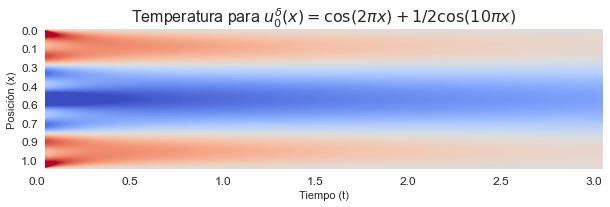

In [34]:
%%time
delta = 0.5
m=n*5
g = lambda x: f(x) + delta * np.cos(m*x*np.pi)
U2 = solve_heat_equation(N, dt, T, g)
plot(
    sol=U2, 
    title=u"Temperatura para $u_0^\delta(x) = \cos(2\pi x) + 1/2 \cos(10\pi x)$", 
    cmap="coolwarm", 
    vmin=-1, vmax=1,
    dt=dt
)
plt.savefig("fig2.pdf", bbox_inches='tight', )

Wall time: 275 ms


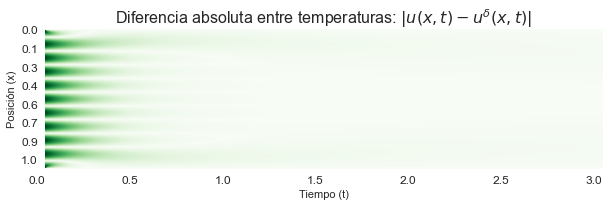

In [35]:
%%time
E = np.abs(U2-U1)
plot(
    sol=E, 
    title=u"Diferencia absoluta entre temperaturas: $|u(x, t)-u^\delta(x, t)|$", 
    cmap="Greens", 
    vmin=0, vmax=None,
    dt=dt
)
plt.savefig("fig3.pdf", bbox_inches='tight', )